# DTSA5509 Final – Supervised Learning Project

## Project Topic
### House Price Prediction

In this final project, I decided to use the Kaggle House Price Prediction Competition dataset (*[Click here to access the House Prices competition on Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)*) to practice Supervised ML. Detailed description of the dataset will be included in the the following EDA section.

I will perform EDA, including data cleaning, imputation, feature selection, and transformation to prepare the data for house price prediction using four different algorithms, among them Lasso Regression is what we have not covered in the course material.
* RandomForest 
* AdaBoost
* Lasso Regression
* SVM

Upon the modeling, I will compare the performance of these regression methods by RMSE and R<sup>2</sup> values, and plot the scatter plots of predicted SalePrice and target SalePrice to draw an conclusion on the performance of the methods tested.

## Exploratory Data Analysis

### Data Access

*[Follow the download link to the data package for the House Prices competition on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt)*

There are 4 files in the downloaded zip directory:
* data_description.txt
* sample_submission.csv
* test.csv
* train.csv

The "test.csv" does not have the target variable SalePrice entries. We will be using the "train.csv" for the entire process with cross-validation and not proceed with the prediction for the "test.csv" since we are not participating in the competition. The data structure, number of observation and the varible types will be examined upon loading them.

In [388]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import datetime

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV, Lasso
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor
# import lightgbm

import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential


from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [195]:
df = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
# test_df = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")
# df = pd.concat([train_df, test_df], axis=0)

# Take a look at the combined dataframe
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Inspect the number of variables and variable types

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data fields description

Here's a shortened version of what we can find in the data description file:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Variable type correction

Some of the variables such as "MSSubClass", "MoSold", and "YrSold" are really better off be modeled as categorical variable. So, we are going to coerce them into categorical varaibles

In [207]:
df["MSSubClass"] = df["MSSubClass"].astype("category")
df["MoSold"] = df["MoSold"].astype("category")
df["YrSold"] = df["YrSold"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

### Check null values

Adopting the method we learned from Week 1 programming assignment (EDA) of this course. We will make a histogram for the null counts to get an overview of the null counts distriution across the variables. Looking at the number of null value and distribution, it's pretty clear that we'd need to do some data cleaning and imputation before the modeling as there are substantial amount of NaN values in the dataset.

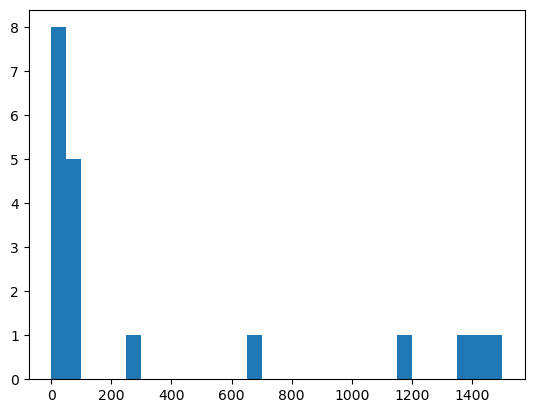

In [208]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Filter out features with zero null counts
null_counts = null_counts[null_counts > 0]

# Create the histogram
histogram = plt.hist(null_counts, bins=range(0, null_counts.max()+50, 50))

# Show the plot
plt.show()

*Complete case analysis (CCA) is to simply drop any observations (rows) that have null values. It is suitable if the number of observations with null values are very small (say, less than 5%) compared to the total number of observations. If it's suitable for CCA, it'll make the EDA anlaysis pretty striaghtforward. So, let's first verify if it's suitable for CCA. In this caes, it's not suitable for a CCA analysis as shown below.*

In [209]:
# Number of observatsion have at least one missing value
rows_with_nulls = df.isna().any(axis=1).sum() 

# Check if the number of observations with missing value is less than 5% of the entire dataset, if not, we cannot use CCA
suitable_cca = 'yes' if rows_with_nulls*1.0/df.shape[0] < 0.05 else 'no'
suitable_cca

'no'

### Imputing missing values

Following the same procedure in Week 1 EDA assignment, I'm going to identify the features with more than 5% missing values to throw away, and the features with less than 5% missing values to keep for imputation.

In [210]:
features_to_impute = []
features_to_throw = []
observation = df.shape[0]
toss_cutoff = 0.05
    
for index, value in null_counts.iteritems():
#     print(f'Index: {index}, Value: {value}')

    if df[index].isnull().sum()/observation > toss_cutoff:
#         print(all_null.sum()/observation)
        features_to_throw.append(index)
    else:
        features_to_impute.append(index)


print(len(features_to_impute), features_to_impute)
print(len(features_to_throw), features_to_throw)

8 ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
11 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Remove the columns according to the above result. Replace the df with the new result. Also remove Id column as it's not a useful feature

In [211]:
# Remove the columns according to the above result, replace df with the new results
# Also remove ID column as it's not a useful feature
features_to_throw.append('Id') # append 'ID' to be thrown
# features_to_impute.remove('Id') # remove 'ID' from the list
df_trimmed = df.drop(features_to_throw, axis=1)

**Impute missing data**

For a numerical variable imputation, we impute mean value if the distribution is symmetric while we use median value to impute when the distribution is skewed. Another method is to assign an arbitrary value that's outside the normal range. Though it can be useful to capture missingness, but it can create outliers. Both mean/median and arbitrary imputation methods are simple to use and suitable when missing values are 5% (no more than 10%) as a rule of thumb. Both methods can distort the original distribution.

For a categorical variable imputation, we can impute with the most frequent categorical value. It is a simple method but it can distort the original distribution. It is also possible to create a "missing" category to capture missingness. The advantage of using missing category is that it captures missingness but its disadvantage is that it creates another rare category.For simplicity, we will adopt the mode imputation in this project.

First off, make a histogram for each feature to be imputed to exam the distribution

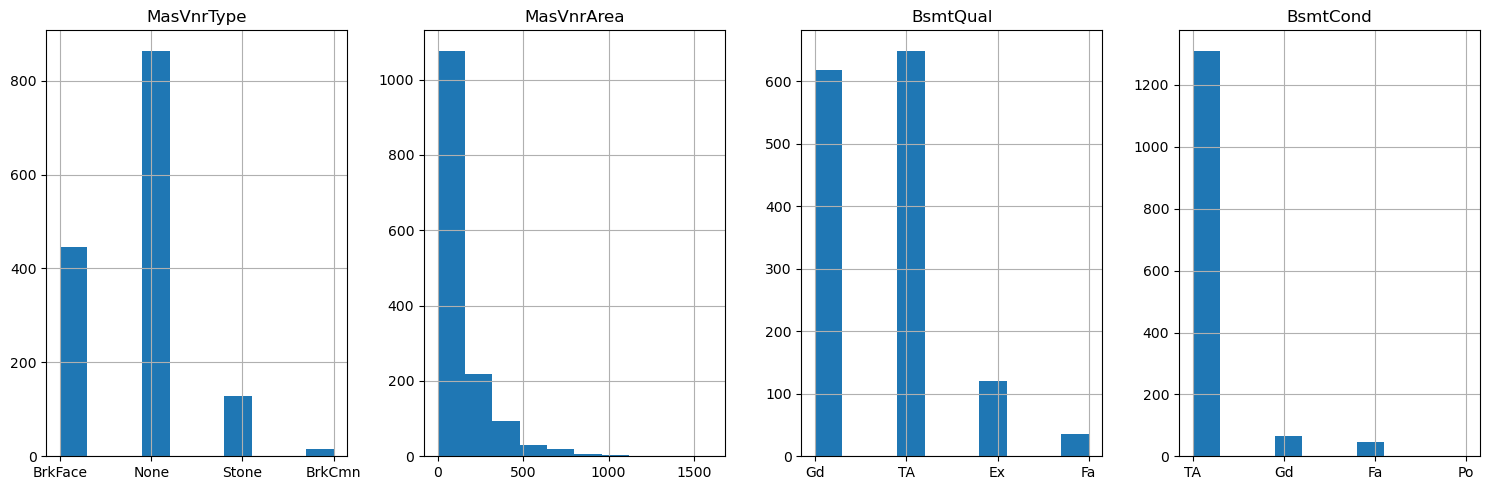

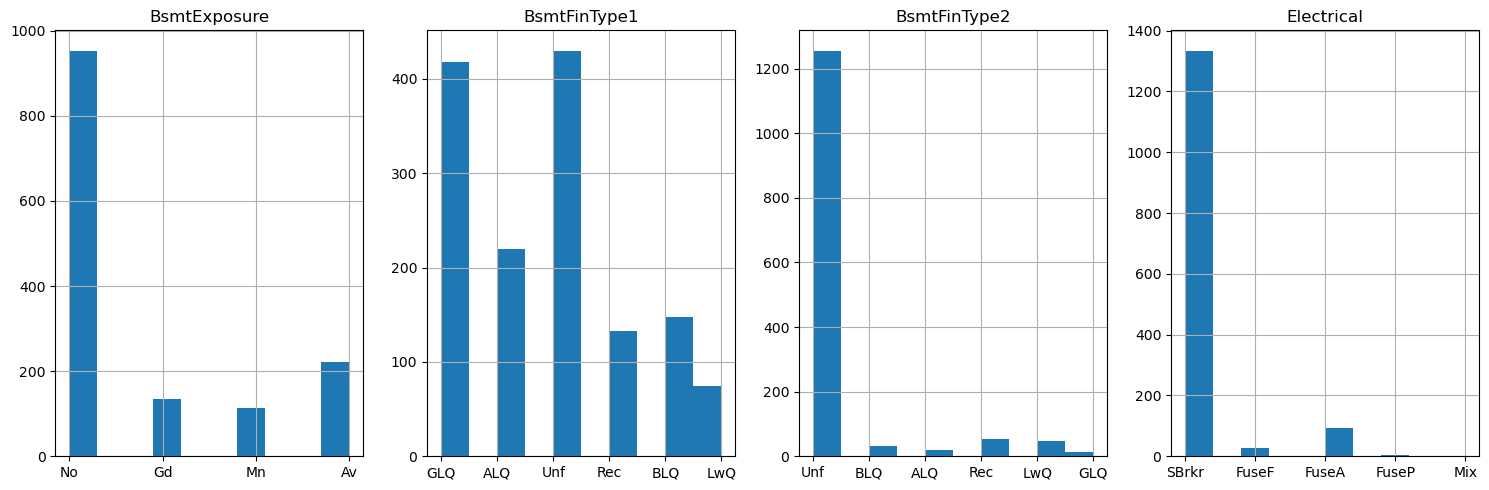

In [212]:
import matplotlib.pyplot as plt

# Set the number of plots per row
plots_per_row = 4

# Initialize a counter for the plots
plot_count = 0

# Iterate through the features
for c in features_to_impute:
    # Create a new figure for each plot
    if plot_count % plots_per_row == 0:
        fig = plt.figure(figsize=(15, 5))
    
    # Create a subplot within the figure
    ax = fig.add_subplot(1, plots_per_row, (plot_count % plots_per_row) + 1)
    
    # Plot the histogram
    df_trimmed[c].hist(ax=ax)
    
    # Set the title
    ax.set_title(c)
    
    # Increment the plot counter
    plot_count += 1
    
    # Show the plot if the row is complete or all plots are done
    if plot_count % plots_per_row == 0 or plot_count == len(features_to_impute):
        plt.tight_layout()
        plt.show()


As shown on the above plots, most of the variables to be imputed are categorical, we an impute them with the mode. There is only one numerical varialbe, "MasVnrArea". It's follows a skewed distribution, so we'd imputed it with the median.

In [215]:
# impute missing data
for c in features_to_impute:
    # categorical feature, impute with the most frequent(mode)
    if df_trimmed[c].dtype == 'object':
        df_trimmed[c].fillna(df_trimmed[c].mode()[0], inplace = True) 
    
    # numerical features, impute with the median
    else:
        df_trimmed[c].fillna(df_trimmed[c].median(), inplace = True)

**Visual inspection to make sure the nulls have all been fixed**

In [214]:
# dtf_overview(df_trimmed, max_cat=20, figsize=(10,5))
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotArea        1460 non-null   int64   
 3   Street         1460 non-null   object  
 4   LotShape       1460 non-null   object  
 5   LandContour    1460 non-null   object  
 6   Utilities      1460 non-null   object  
 7   LotConfig      1460 non-null   object  
 8   LandSlope      1460 non-null   object  
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  Condition2     1460 non-null   object  
 12  BldgType       1460 non-null   object  
 13  HouseStyle     1460 non-null   object  
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

### Feature Engineering

To enhance our models' performance, we will incorporate additional features that consider the age of the houses. This approach is based on the understanding that the relative difference between the ages of houses might hold more significance than the difference between their construction years. Comparing a 10-year-old house to a 20-year-old house is typically easier than comparing a house built in 2000 to one built in 2010.

In [229]:
import datetime

# Add and change some variables, namely the "Year" ones as it would be better to have them as "Age"
year = datetime.date.today().year
df_trimmed["AgeSold"] = int(year) - df_trimmed["YrSold"].astype(int)
df_trimmed["AgeBuilt"] = int(year) - df_trimmed["YearBuilt"].astype(int)

Also, it makes better sense to combine the different area varaibles into a single varible, namely "TotalArea". This is inspired by 

*[Sebastien Callebaut's tutorial on the house price competition](https://medium.com/@sebastiencallebaut/kaggle-housing-competition-learn-with-a-step-by-step-solution-bdca19cc8eed)*

In [230]:
# Add some features related to total area of the house
df_trimmed['TotalArea'] = df_trimmed['TotalBsmtSF'] + df_trimmed['1stFlrSF'] + df_trimmed['2ndFlrSF'] + df_trimmed['GrLivArea'] + df_trimmed['GarageArea']
df_trimmed['Bathrooms'] = df_trimmed['FullBath'] + df_trimmed['HalfBath']/2
df_trimmed['YearAvg']= (df_trimmed['YearRemodAdd']+df_trimmed['YearBuilt'])/2


Now, let's drop these original features from which we have engineered the new features as they will be collinear with the new feature

In [234]:
features_to_drop = ['YrSold', 'YearBuilt','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea','FullBath', 'HalfBath','YearRemodAdd', 'YearBuilt']
df_trimmed.drop(features_to_drop, axis=1, inplace=True)

In [418]:
# df_trimmed.info()

### Feature Selection

Usually, we'd examine the cross correlation coefficent matrix to identify which numerical features correlate with the SalePrice the most and identify which ones might be collinear so that we can eliminate some of them before the modeling. However, in this case, the number of variables makes the cross correlation coefficient matrix a bit overwhelming to digest as shown below. Therefore, I will examine the PPS (Prediction Power Score) to identify which features are of the most prediction power for SalePrice, and then select the top predictive variable for further examination.

In [244]:
# Compute the pps scores
pps = ppscore.matrix(df_trimmed)

<AxesSubplot:xlabel='x', ylabel='y'>

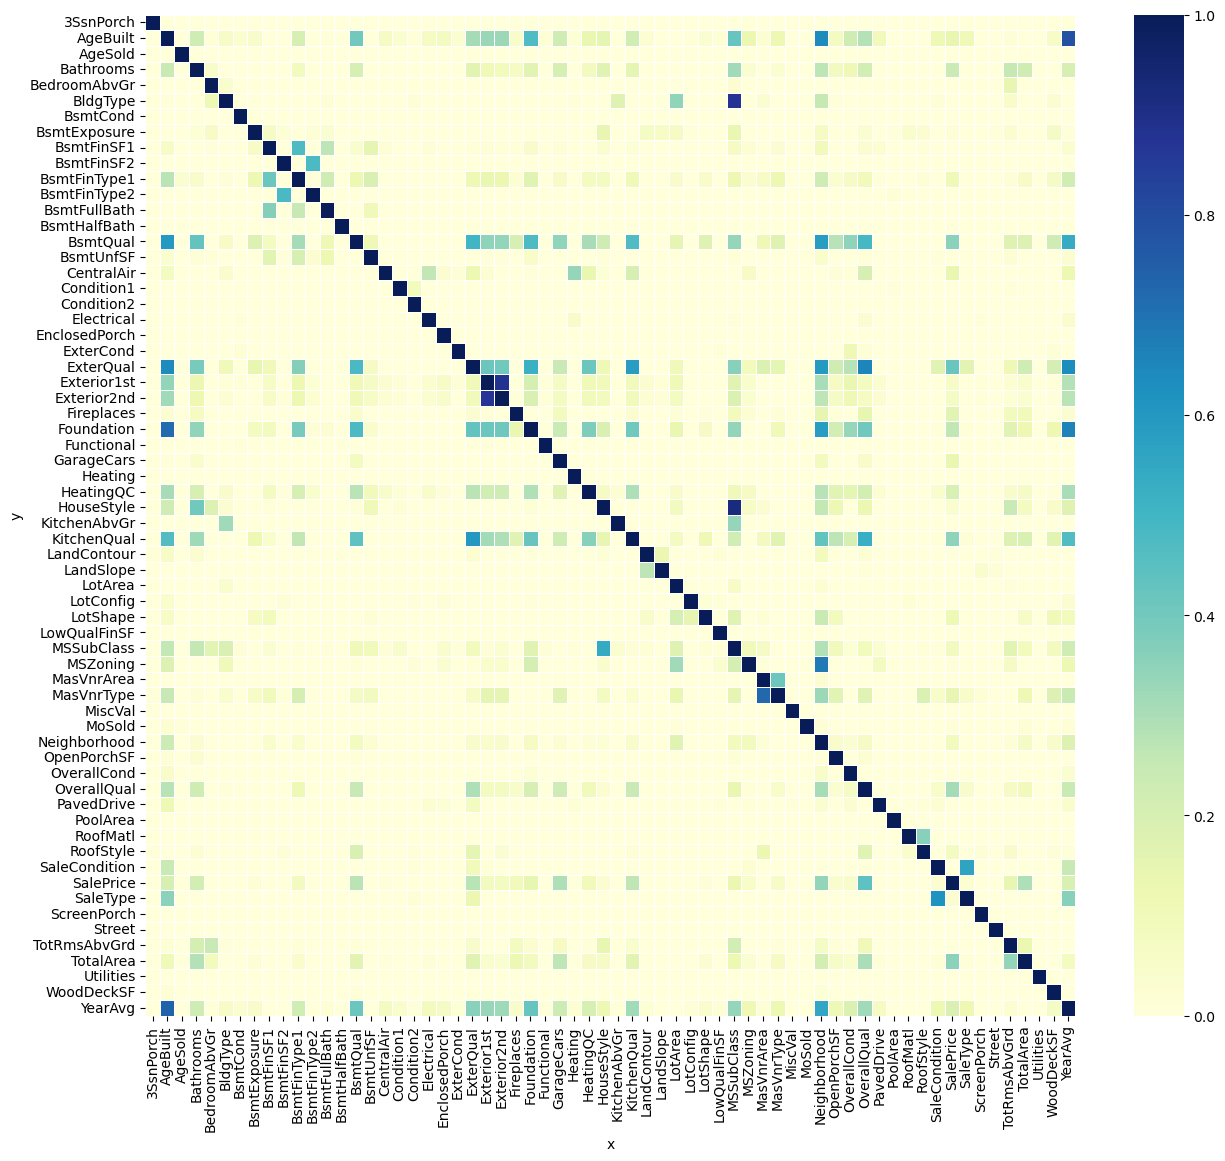

In [245]:
# Extract the scores and variables from the pps matrix to plot
pps_matrix = pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
fig, ax = plt.subplots(figsize=(15,13))
sns.heatmap(pps_matrix, annot=False, fmt='.2f', cmap="YlGnBu", ax=ax, cbar=True, linewidths=0.5)
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [248]:
# Extract the top 30 predictors for SalePrice
# pps_sale_price = pps_matrix.loc['SalePrice'].sort_values(ascending=False)
# pps_sale_price.head(30)

*The PPS score measures the predictive relationship between two variables, capturing both linear and non-linear relationships. The score ranges from 0 to 1, where 0 indicates no predictive power and 1 indicates a perfect predictive relationship. It helps assess the predictive power between variables, going beyond traditional correlation analysis. Therefore, I would choose the top variables according to the PPS (>=0.1)for the modeling process ensue*

In [407]:
features_to_keep = []
pps_cutoff = 0.1

for index, value in pps_sale_price[pps_sale_price >= pps_cutoff].iteritems():
    # print(f'Index: {index}, Value: {value}')
    features_to_keep.append(index)

df_final = df_trimmed[features_to_keep]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SalePrice     1460 non-null   int64   
 1   OverallQual   1460 non-null   int64   
 2   Neighborhood  1460 non-null   object  
 3   GarageCars    1460 non-null   int64   
 4   TotalArea     1460 non-null   int64   
 5   ExterQual     1460 non-null   object  
 6   BsmtQual      1460 non-null   object  
 7   KitchenQual   1460 non-null   object  
 8   Bathrooms     1460 non-null   float64 
 9   AgeBuilt      1460 non-null   int64   
 10  YearAvg       1460 non-null   float64 
 11  Foundation    1460 non-null   object  
 12  TotRmsAbvGrd  1460 non-null   int64   
 13  MSSubClass    1460 non-null   category
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 150.5+ KB


### Correlation analysis
*Examine the relationship between the categorical variables and the target variable*

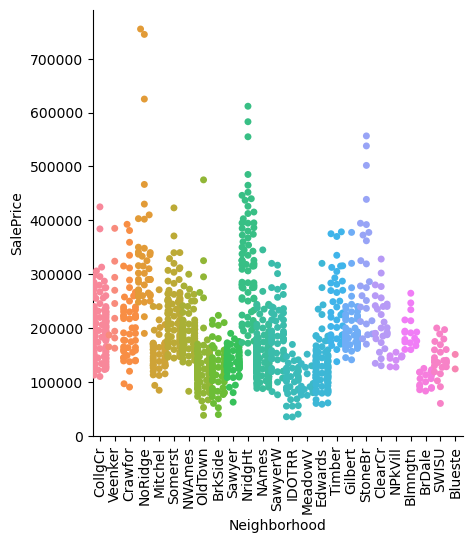

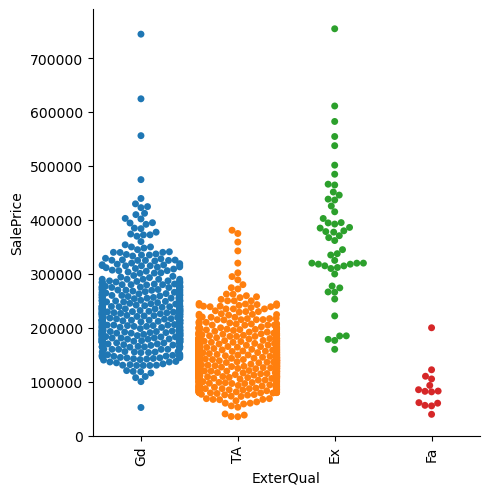

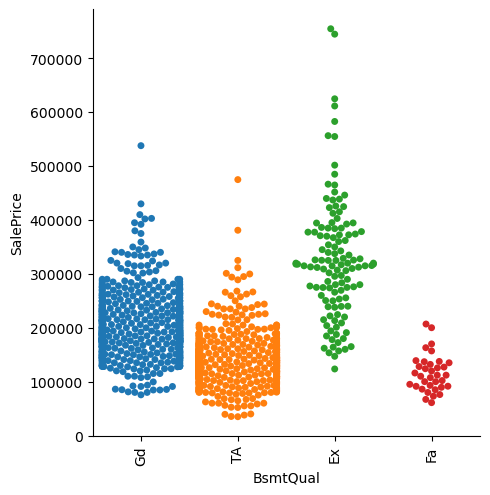

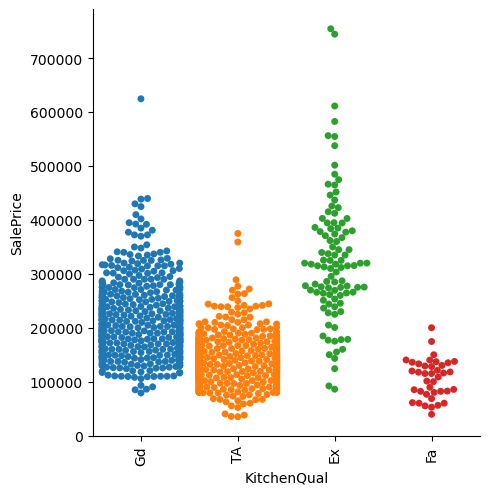

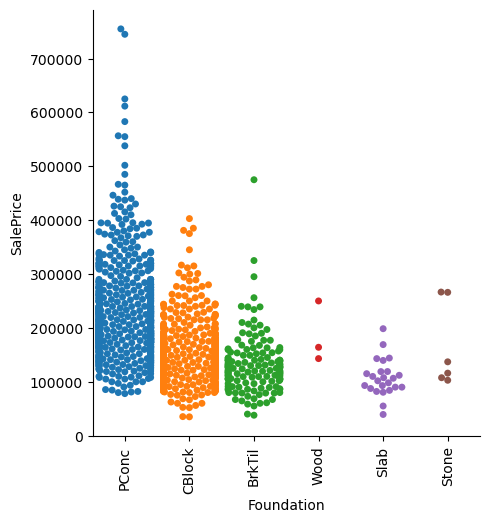

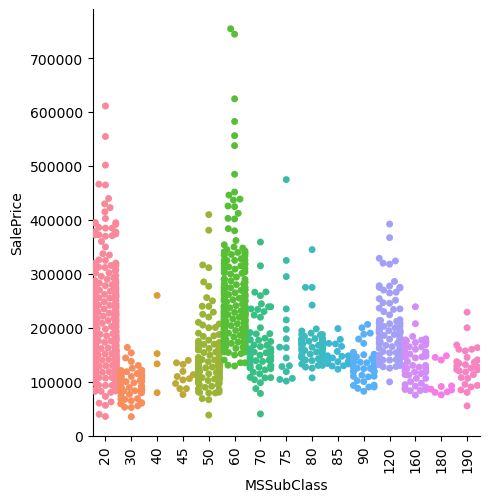

In [411]:
# Check the SalePrice distribution by different types of variables
for column in df_final.columns:
    if pd.api.types.is_categorical_dtype(df_final[column])or pd.api.types.is_object_dtype(df_final[column]):
        # print("Categorical Variable:", colum)
        cat_plot = sns.catplot(y="SalePrice", x=column, kind="swarm", legend="full", data=df_final);
        cat_plot.set_xticklabels(rotation=90)

**Correlation matrix**

For the continuous variables, we can inspect the relation between them and the SalePrice by computing and plotting the correlation matrix

In [285]:
# Compute the correlation matrix and plot
corr_matrix = df_final.corr()

# corr = corr_matrix(df_trimmed, method='pearson', negative=False, annotation=False, figsize=(15,13))


<AxesSubplot:>

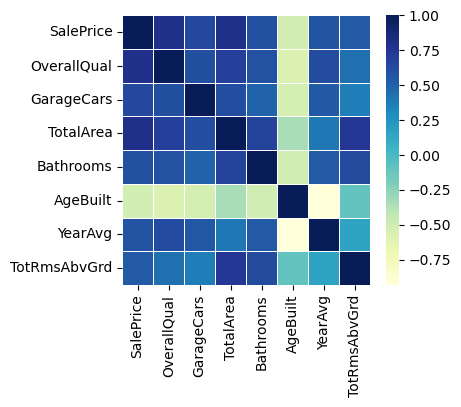

In [286]:
fig, ax = plt.subplots(figsize=(4,3.5))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap="YlGnBu", ax=ax, cbar=True, linewidths=0.5)

In [289]:
# Sort the correlation matrix to see which features correlate with SalePrice the most
corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(10)


TotalArea       0.801018
OverallQual     0.790982
GarageCars      0.640409
Bathrooms       0.597966
YearAvg         0.576144
TotRmsAbvGrd    0.533723
AgeBuilt       -0.522897
Name: SalePrice, dtype: float64

**Pair plots**

Now, let's take a look at the pair plots to see if we can identify any potential collinearity. Among the 7 continuous variables, it does not seem to be strong colliearity exists. Part of the reason could be attributed to the PPS selection process.

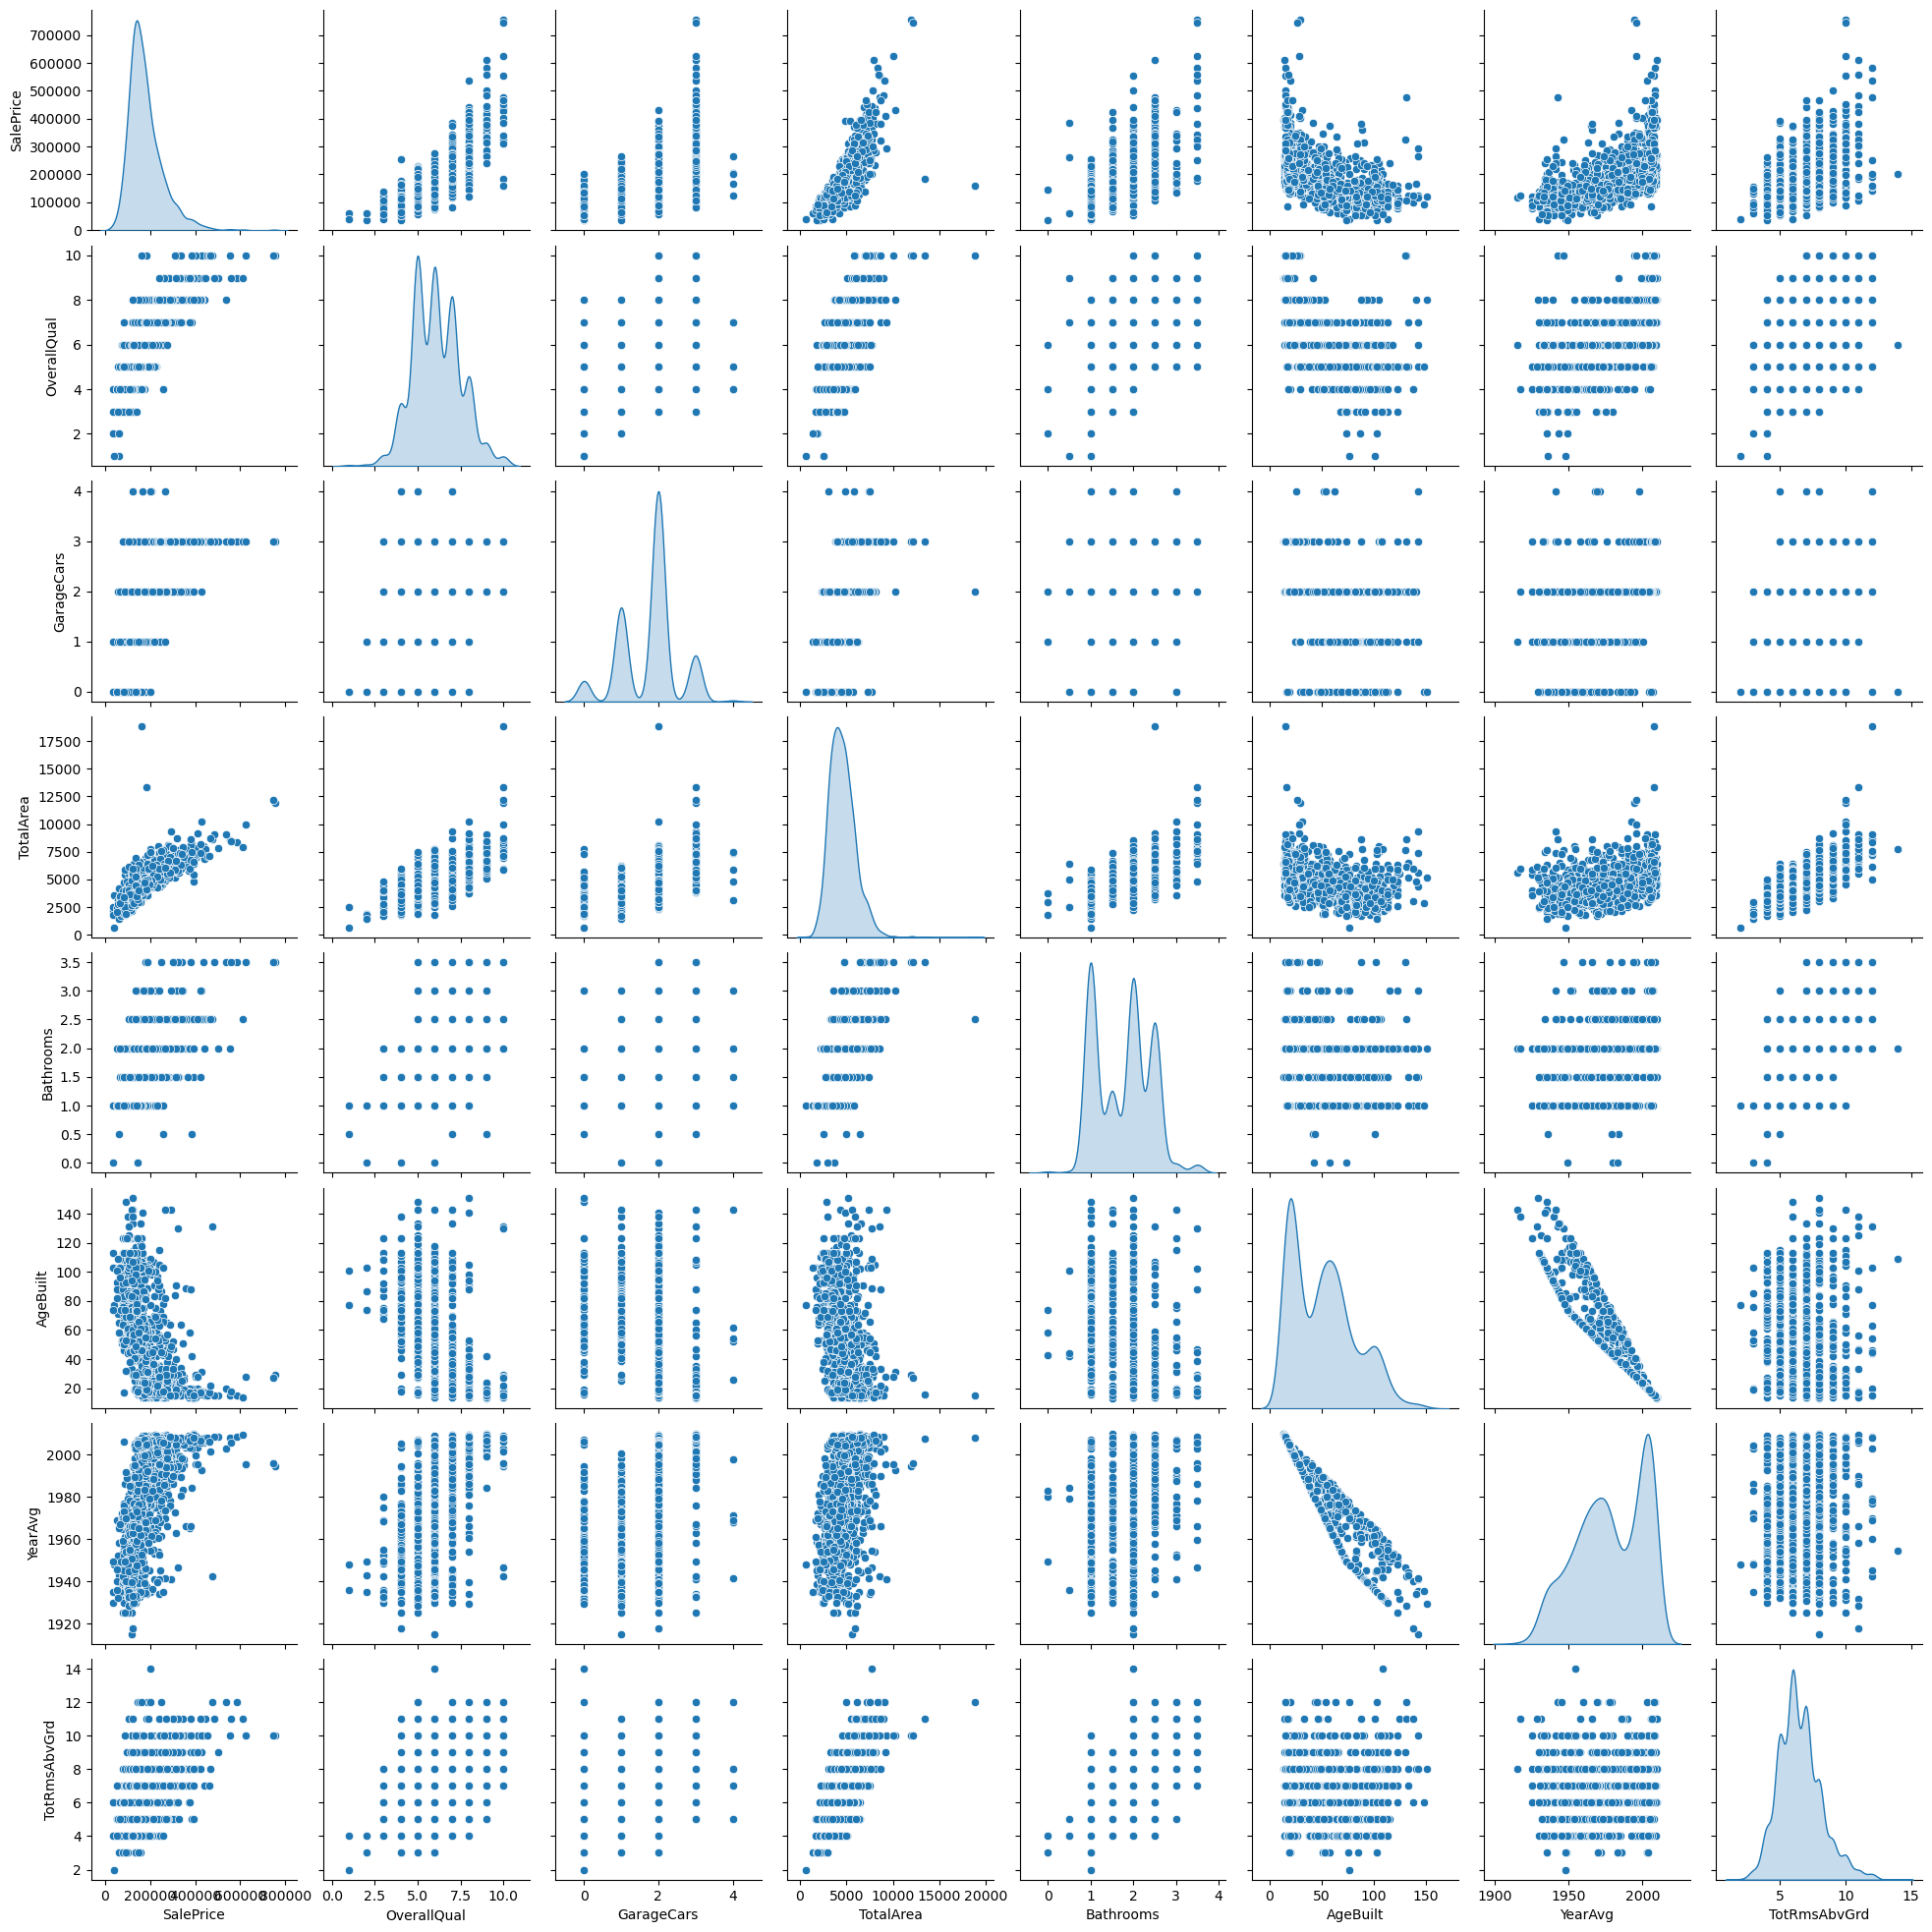

In [290]:
# Inspecting relationships between features using a pair plot. This
sns.pairplot(df_final, diag_kind = 'kde')

### Data Transformation

As there is not a strong collinearity observed in the pair plots with respect to the SalePrice. We are poised to do some final data transformation before the modeling process.
- Encode categorical data
- Skweness correction (log transform) for the target variable
- Scaling
- Dataset partitioning

In [313]:
# df_final.info()

In [357]:
# In case we need to go back to the df_final before transformation
df_final = df_trimmed[features_to_keep]
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SalePrice     1460 non-null   int64   
 1   OverallQual   1460 non-null   int64   
 2   Neighborhood  1460 non-null   object  
 3   GarageCars    1460 non-null   int64   
 4   TotalArea     1460 non-null   int64   
 5   ExterQual     1460 non-null   object  
 6   BsmtQual      1460 non-null   object  
 7   KitchenQual   1460 non-null   object  
 8   Bathrooms     1460 non-null   float64 
 9   AgeBuilt      1460 non-null   int64   
 10  YearAvg       1460 non-null   float64 
 11  Foundation    1460 non-null   object  
 12  TotRmsAbvGrd  1460 non-null   int64   
 13  MSSubClass    1460 non-null   category
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 150.5+ KB


**Encode categorical data**

*As shown above, we have almost half of the variables as categorical. An ML algorithm generally has no idea what a “SaleType” of “WD” means. So, we will encode the categorical variables. In this project, we have tried the LabelEncoder from sklearn due to its simplicity by not adding extra features.*

In [358]:
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through the categorical variables and apply label encoding
for var in df_final.columns:
    if pd.api.types.is_categorical_dtype(df_final[var])or pd.api.types.is_object_dtype(df_final[var]):
        encoded_col = var + '_encoded'
        df_final[encoded_col] = label_encoder.fit_transform(df_final[var])
        df_final = df_final.drop(var, axis=1)
        df_final = df_final.rename(columns={encoded_col: var})


In [360]:
df_final.head()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   TotalArea     1460 non-null   int64  
 4   Bathrooms     1460 non-null   float64
 5   AgeBuilt      1460 non-null   int64  
 6   YearAvg       1460 non-null   float64
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   Neighborhood  1460 non-null   int64  
 9   ExterQual     1460 non-null   int64  
 10  BsmtQual      1460 non-null   int64  
 11  KitchenQual   1460 non-null   int64  
 12  Foundation    1460 non-null   int64  
 13  MSSubClass    1460 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 159.8 KB


*Alternatively, we can use dummy encoding. But this will create many more variables. So, Let's keep this as a backup plan.*

In [386]:
# Loop through the categorical variables and apply label encoding
# for var in df_final.columns:
#     if pd.api.types.is_categorical_dtype(df_final[var])or pd.api.types.is_object_dtype(df_final[var]):
#         dummies = pd.get_dummies(df_final[var], prefix=var, drop_first=True)
#         df_final = pd.concat([df_final, dummies], axis=1)
#         df_final.drop(col, axis=1, inplace=True)

**Skweness correction**

The target variable "SalePrice" does not seem to be normally distributed (Skew and Kurtosis). Let's apply a log transformation to the “SalePrice”.

In [373]:
# Log transform the SalePrice as it is skewed
df_final["SalePrice"] = np.log1p(df_final["SalePrice"])

In [376]:
df_final["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [374]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   TotalArea     1460 non-null   int64  
 4   Bathrooms     1460 non-null   float64
 5   AgeBuilt      1460 non-null   int64  
 6   YearAvg       1460 non-null   float64
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   Neighborhood  1460 non-null   int64  
 9   ExterQual     1460 non-null   int64  
 10  BsmtQual      1460 non-null   int64  
 11  KitchenQual   1460 non-null   int64  
 12  Foundation    1460 non-null   int64  
 13  MSSubClass    1460 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 159.8 KB


,SalePrice,OverallQual,GarageCars,TotalArea,Bathrooms,AgeBuilt,YearAvg,TotRmsAbvGrd,Neighborhood,ExterQual,BsmtQual,KitchenQual,Foundation,MSSubClass
0,12.247699,7,2,4824,2.5,20,2003.0,8,5,2,2,2,2,5
1,12.109016,6,2,4246,2.0,47,1976.0,6,24,3,2,3,1,0
2,12.317171,7,2,5100,2.5,22,2001.5,6,5,2,2,2,2,5
3,11.849405,7,3,4832,1.0,108,1942.5,7,6,3,3,2,0,6
4,12.429220,8,3,6377,2.5,23,2000.0,9,15,2,2,2,2,5


***Now let's scale the dataset***

Scaling the data is crucial for improving the predictions of many algorithms, as they heavily rely on the distances between predicted and real values. Scaling ensures that these distances are not affected by the varying scales of different variables. For example, errors between the surface area of a house and its 'OverallCond' (overall condition) should not be compared on the same scale.


To achieve this, we employ the RobustScaler() method, which is particularly effective in minimizing the impact of outliers. RobustScaler() robustly estimates the statistical properties of the data, providing a scaling mechanism that is more resilient to extreme values."

In [377]:
# Separate the features and target variable
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

# Create a RobustScaler object
scaler = RobustScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, index = X.index, columns= X.columns)

X_scaled_df.head()

,OverallQual,GarageCars,TotalArea,Bathrooms,AgeBuilt,YearAvg,TotRmsAbvGrd,Neighborhood,ExterQual,BsmtQual,KitchenQual,Foundation,MSSubClass
0,0.5,0.0,0.247391,0.333333,-0.652174,0.643533,1.0,-0.7,-1.0,0.0,-1.0,1.0,0.166667
1,0.0,0.0,-0.078702,0.000000,-0.065217,-0.037855,0.0,1.2,0.0,0.0,0.0,0.0,-0.666667
2,0.5,0.0,0.403103,0.333333,-0.608696,0.605678,0.0,-0.7,-1.0,0.0,-1.0,1.0,0.166667
3,0.5,1.0,0.251904,-0.666667,1.260870,-0.883281,0.5,-0.6,0.0,1.0,-1.0,-1.0,0.333333
4,1.0,1.0,1.123554,0.333333,-0.586957,0.567823,1.5,0.3,-1.0,0.0,-1.0,1.0,0.166667


## Modeling

### Split the dataset for training and test

In [378]:
# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [379]:
X_train

array([[-0.5       , -1.        , -0.08434415, ...,  0.        ,
         0.        , -0.66666667],
       [ 0.        ,  0.        , -0.03638928, ...,  0.        ,
         1.        ,  0.16666667],
       [-0.5       , -2.        , -1.12693935, ...,  0.        ,
         0.        , -0.5       ],
       ...,
       [-0.5       ,  0.        , -0.68913963, ...,  0.        ,
         0.        , -0.66666667],
       [ 0.5       , -1.        , -0.22877292, ..., -1.        ,
        -1.        ,  0.        ],
       [ 0.5       ,  1.        ,  0.42736248, ..., -1.        ,
         1.        ,  1.16666667]])

**Models to try**
- RandomForest
- AdaBoost
- Lasso Regression
- SVM

### RandomForest

*Grid search of the hyperparamters to find the best RandomForest model*

In [380]:
# RANDOM FOREST

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 5, 7],
    'min_samples_split': [2, 4, 8, 16],
    'n_estimators': [100, 250, 500, 750]
}

# Instantiate reg for gridsearch
rf = RandomForestRegressor()

# Conduct the gridsearch
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
rf_best_params = grid_search.best_params_
print("Best Parameters are:",grid_search.best_params_)

# Create a random forest with best parameters
rf_reg = RandomForestRegressor(**rf_best_params, n_jobs=-1, random_state=12)

# Fit the model to the data
rf_reg.fit(X_train, y_train)


# Create predictions
# predictions = np.exp(rf_reg.predict(X_test))
# my_pred_rf = pd.DataFrame({'SalePrice': predictions})

# # Create CSV file
# my_pred_rf.to_csv('../solution/pred_rf.csv',index=False)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best Parameters are: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 250}
RandomForestRegressor RMSE: 0.17119939295340464


*Scatter plot of the best model with r2 and RMSE values shown*

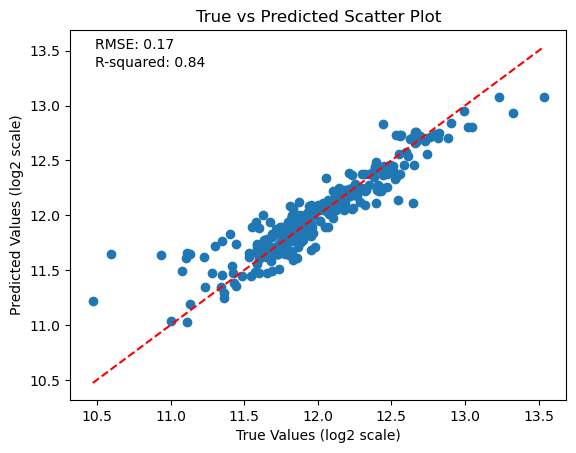

In [395]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)

# Plot true vs predicted values
plt.scatter(y_test, y_pred_rf)
plt.xlabel("True Values (log2 scale)")
plt.ylabel("Predicted Values (log2 scale)")
plt.title("True vs Predicted Scatter Plot")

# Add RMSE and R-squared values to the plot
plt.text(0.05, 0.95, f"RMSE: {sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}", transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes)

# Add a fitted line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

### AdaBoost

*Grid search of the hyperparamters to find the best AdaBoost model*

In [396]:
# ADA BOOST

# Grid search for best params
param_grid = {
 'n_estimators': [100, 250, 500, 750],
 'learning_rate' : [0.01, 0.05, 0.1, 0.3, 1],
 'loss' : ['linear', 'square', 'exponential']
 }

# Instantiate reg for gridsearch
ab_reg = AdaBoostRegressor()

# Conduct the gridsearch
grid_search = GridSearchCV(estimator = ab_reg, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
ada_best_params = grid_search.best_params_
print("Best Parameters are:",grid_search.best_params_)

# Create a random forest with best parameters
ab_reg = AdaBoostRegressor(**ada_best_params, random_state= 12)

# Fit the model to the data
ab_reg.fit(X_train, y_train)

# Predict on the test set from our training set
y_pred_ab = ab_reg.predict(X_test)
print("AdaBoostRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_ab)))


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best Parameters are: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
AdaBoostRegressor RMSE: 0.1855662232978547


*Scatter plot of the best model with r2 and RMSE values shown*

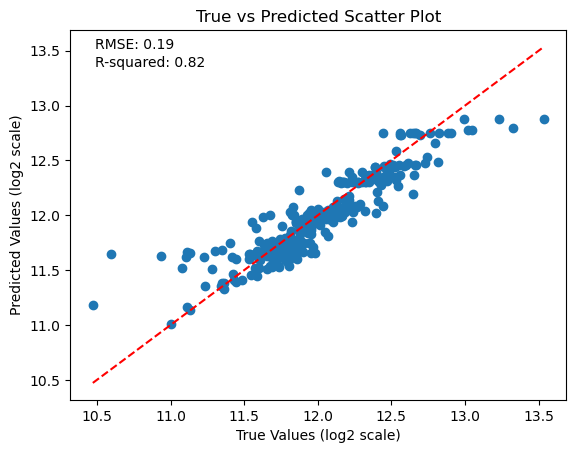

In [399]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ab))

# Calculate R-squared
r2 = r2_score(y_test, y_pred_ab)

# Plot true vs predicted values
plt.scatter(y_test, y_pred_ab)
plt.xlabel("True Values (log2 scale)")
plt.ylabel("Predicted Values (log2 scale)")
plt.title("True vs Predicted Scatter Plot")

# Add RMSE and R-squared values to the plot
plt.text(0.05, 0.95, f"RMSE: {sqrt(mean_squared_error(y_test, y_pred_ab)):.2f}", transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes)

# Add a fitted line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

### Lasso


*Grid search of the hyperparamters to find the best Lasso regression model*

In [414]:
# REGULARIZATION WITH LASSO
# Set parameters to iterate over
parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

# Instantiate reg for gridsearch
lasso=Lasso()
# Conduct the gridsearch
grid_search = GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train, y_train)
lasso_best_params = grid_search.best_params_
print("Best Parameters are:",grid_search.best_params_)

# Instantiate new lasso reg with best params
lasso_reg = Lasso(**lasso_best_params)

# Fit the model to the data
lasso_reg.fit(X_train,y_train)

# Predict on the test set from our training set
y_pred_lasso = lasso_reg.predict(X_test)
print("LassoRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_lasso)))

Best Parameters are: {'alpha': 0.002}
LassoRegressor RMSE: 0.16893902350596765


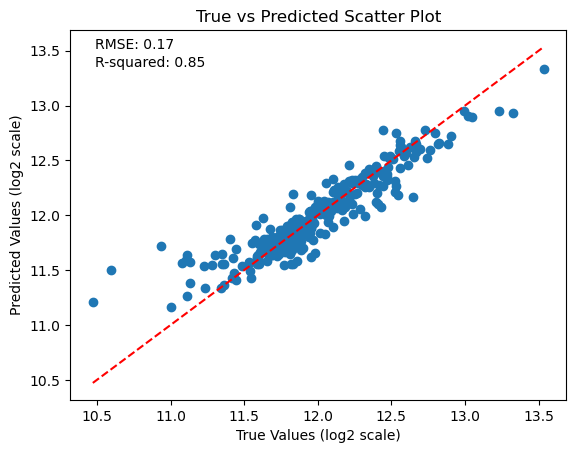

In [402]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Calculate R-squared
r2 = r2_score(y_test, y_pred_lasso)

# Plot true vs predicted values
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("True Values (log2 scale)")
plt.ylabel("Predicted Values (log2 scale)")
plt.title("True vs Predicted Scatter Plot")

# Add RMSE and R-squared values to the plot
plt.text(0.05, 0.95, f"RMSE: {sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}", transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes)

# Add a fitted line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

### SVM

In [415]:
# SVM
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Create an SVR object
svr = SVR()

# Create the grid search object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Instantiate new lasso reg with best params
svr_reg = SVR(**grid_search.best_params_)

# Fit the model to the data
svr_reg.fit(X_train,y_train)

# Predict on the test set from our training set
y_pred_svr = svr_reg.predict(X_test)
print("LassoRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_svr)))


Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.02250868152878105
LassoRegressor RMSE: 0.15555533325173468


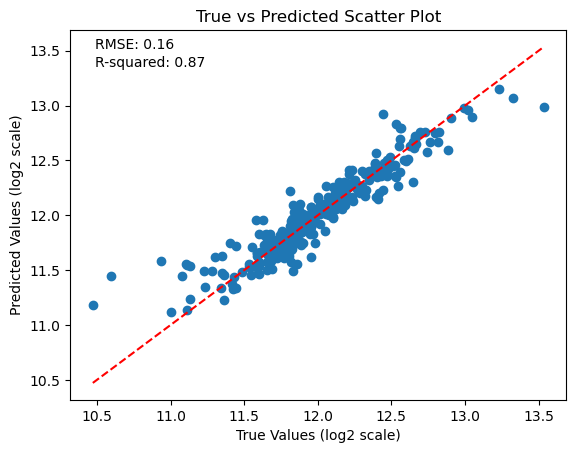

In [416]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Calculate R-squared
r2 = r2_score(y_test, y_pred_svr)

# Plot true vs predicted values
plt.scatter(y_test, y_pred_svr)
plt.xlabel("True Values (log2 scale)")
plt.ylabel("Predicted Values (log2 scale)")
plt.title("True vs Predicted Scatter Plot")

# Add RMSE and R-squared values to the plot
plt.text(0.05, 0.95, f"RMSE: {sqrt(mean_squared_error(y_test, y_pred_svr)):.2f}", transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes)

# Add a fitted line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

## Results and Analysis

I decided to use this Kaggle House Prediction dataset due to the extensive experience I accumulated with the Week 1 assignment, with which we've done substantial EDA analysis with this dataset. However, the Week 1 assignment only included an oversimplified dataset in the end for us to model. Therefore, it makes it a worthy task to continue with a more realistic dataset for the modeling process. 

Upon the proper cleaning imputation, the dataset is relatively well structured and has much more observation than the features. Upon careful examination of the features, it became evident that some of the features are akin to each other. For example, the square foot of different areas, the build and modeling year, etc. So, it makes the best sense to include a feature engineering step to combine them, which is reflected in the corresponding section in this submitted notebook. This step left the dataset with well over 60 features, which would pose challenge to the modeling process given limited computation resource. Therefore, it's desirable to do some feature selection.

PPS (Predictive Power Score) is a statistical metric that measures the predictive power of one feature in relation to another feature or the target variable. Comparing to the correlation score, it considers both linear and non-linear relationships and provides insights into the predictability of one feature based on another. PPS matrix helps assess the predictive power between variables even when traditional correlation analysis indicates little correlation. Therefore, I chose to use PPS to guide the feature selection, variable importance determination, and uncover non-linear relationships in the data. Using the cutoff of PPS of 0.1, 12 most predictive features were left in the dataset. Inspecting the pair plots, I did not find evident collinearity. So, I was confident to proceed with the categorical variable encoding and scaling to prep the data for the modeling.

All the categorical variables were encoded with the Label Encoding for its simplicity. Label encoding assigns a unique numeric label to each category in a categorical variable. In our case, it maps each category to an integer value. The target variable, SalePrice, features a skewed distribution, which is not ideal for a regression model. So, a log2 transformation was applied to it to correct the skewness.

I chose RandomForest, AdaBoost, Lasso regression, and SVM for the modeling mainly for their robustness in modeling well structured data. As we can see from the plots above, RandomForest, AdaBoost, Lasso regression, and SVM all perform quite well for the prediction task, with the SVM performs the best among them (R<sup>2</sup>=0.87, RMSE=0.16). AdaBoost perform the worst among them (R<sup>2</sup>=0.82, RMSE=0.19). RandomForest (R<sup>2</sup>=0.84, RMSE=0.17) and Lasso (R<sup>2</sup>=0.85, RMSE=0.17) are close enough in terms of the performance. A quick examination on the best performing method SVM, we can tell that the best parameter set entails the RBF kernal, which is capable of capture non-linear relationship among the variables. This is an indication that enabling non-linear relationship modeling for this dataset is beneficial.


## Discussion

In this final project practice, I have combined what I learned from the course (general EDA, supervised learning, hyperparameter optimization) with additional essential techniques I learned from external to the course, such as feature selection, feature engineering, categorical variable encoding, and data transformation to apply them to the real world Kaggle House Price prediction dataset.


I order to get the best performance, multiple iterations of the modeling were performed to test the effect of feature engineering, target variable log transformation and hyperparameter grid search. The code is fully automated except for the feature engineering step, which is by nature a manual step takes human interpretation and intervention. This approach facilitates convenient iteration for improvement. I have achieved generally good performance with all the supervised learning methods I tested (with R<sup>2</sup> ranging from 0.82 to 0.87). Although I have not got to learn what the best we can do, I tend to believe that there is room to improve on the following aspects:



- I've only done very limited feature engineering. Many other features in the dataset can potentially be combined (or transformed before combined) to be preserved for the modeling process. This would require more careful inspection or even some domain knowledge to facilitate.

- I opted to use PPS to select the top features for feature selection. Although this is generally a good practice, this can possibly lead to accidental loss of the important features, thereby, undermine the model performance. Another approach I learned was to feed all of them to an ensemble model such as AdaBoost and then evaluate the feature importance before selection. But I did not get my code to work for that, so I decided to forgo that approach.

- To do the categorical variable encoding, I used the simplest LabelEncoding to keep the number of variables low in the modeling. However, this can potentially be a problem as this encoding might mistakenly introduce or disrupt an underlying linear relationship between them and the target variable. The dummy variable encoding might be a better approach, but I did not get the time to try it.

- I only corrected the skewness for the target variable. As a matter of fact, the distribution of "AgeBuilt", "TotalArea" both feature skewed distribution. They should be better off corrected as well before scaling.

- In searching for the optimal hyperparameter set for these methods, I performed GridSearch in all cases. I tried to be as extensive as possible for the searches. However, it's apparent that some of the searches tend to be limited due to resource and time constraints. For example, in the RandomForest search, I restricted the 'max_depth' of the tree to be in the range of 2 to 5. This in principle can contribute the inferior performance of the algorithm. Similar restrictions are also applied to other parameters as well such as 'min_samples_leaf', 'min_samples_split', 'n_estimators', etc., for RandomForest and other algorithm, wherever it's applied. Arguablly, if I were to make them more inclusive, better than reported performance can potentially be achieved.

